### Task 20: Feature Engineering Feature Engineering is critical in machine learning as it directly impacts the model's performance by providing better input data. Here are the detailed steps for each task:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')


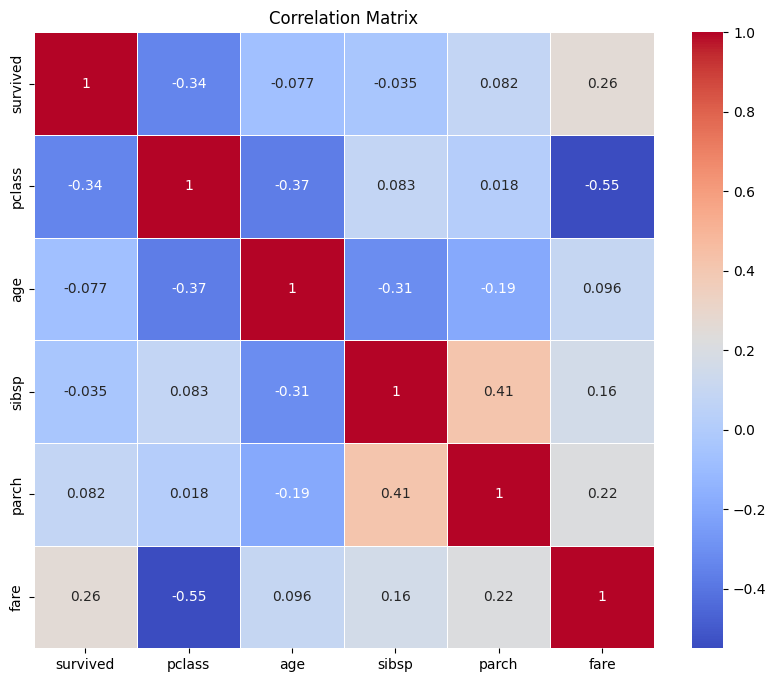

In [3]:
# Selecting numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_features].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9948\3447504588.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores, y=mi_scores.index, palette='viridis')


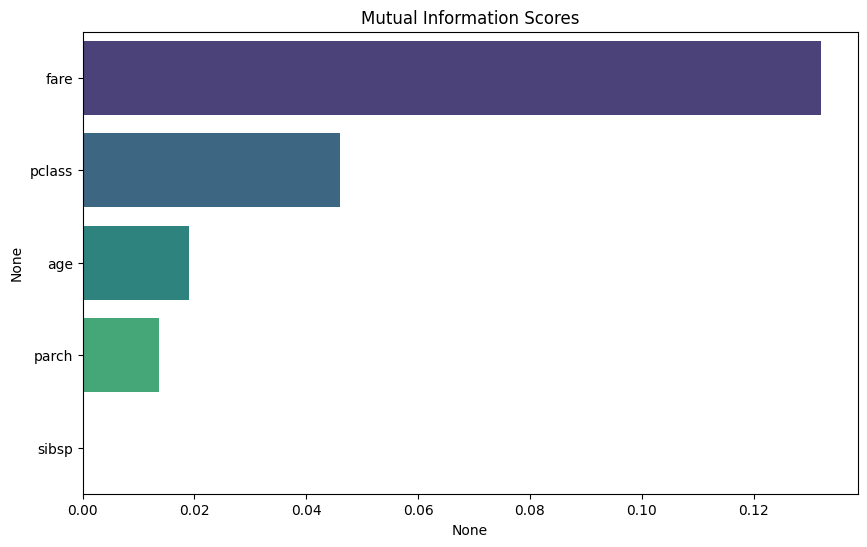

In [6]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['survived', 'embarked', 'sex', 'deck', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone'])
y = df['survived']

# Dropping rows with any missing values in X or y
df_clean = X.join(y).dropna()
X_clean = df_clean.drop(columns=['survived'])
y_clean = df_clean['survived']
# Calculating mutual information
mi = mutual_info_classif(X_clean, y_clean)
mi_scores = pd.Series(mi, index=X_clean.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Visualizing mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index, palette='viridis')
plt.title('Mutual Information Scores')
plt.show()


### Task 2: Feature Transformation


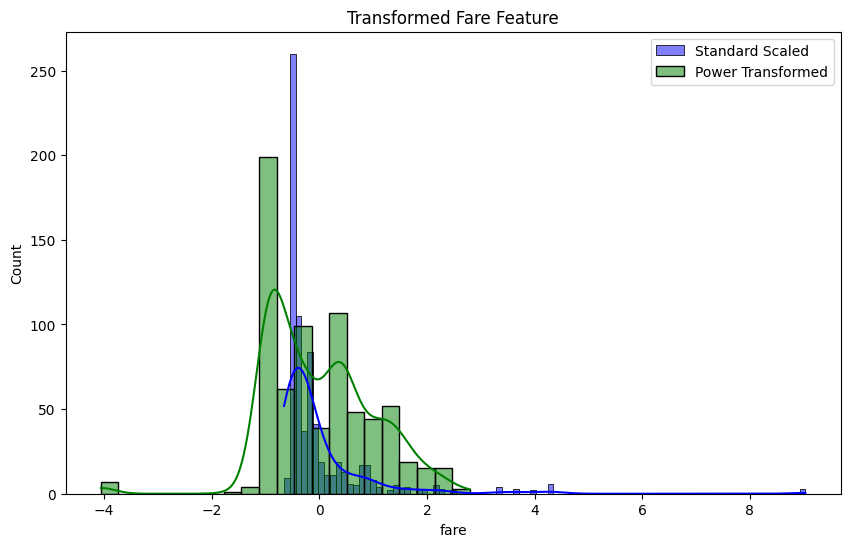

In [12]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Dropping categorical features for scaling
X = df.drop(columns=['survived', 'embarked', 'sex', 'deck', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone'])
y = df['survived']

# Dropping rows with any missing values in X or y
df_clean = X.join(y).dropna()
X_clean = df_clean.drop(columns=['survived'])
y_clean = df_clean['survived']

# Applying Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

# Applying Power Transformation
power = PowerTransformer()
X_power = power.fit_transform(X_clean)
X_power = pd.DataFrame(X_power, columns=X_clean.columns)

# Visualizing transformed features
plt.figure(figsize=(10, 6))
sns.histplot(X_scaled['fare'], kde=True, color='blue', label='Standard Scaled')
sns.histplot(X_power['fare'], kde=True, color='green', label='Power Transformed')
plt.title('Transformed Fare Feature')
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

# Model without transformation
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy with Standard Scaling: {accuracy_score(y_test, y_pred)}')

# Model with power transformation
X_train, X_test, y_train, y_test = train_test_split(X_power, y_clean, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy with Power Transformation: {accuracy_score(y_test, y_pred)}')


Accuracy with Standard Scaling: 0.6643356643356644
Accuracy with Power Transformation: 0.6573426573426573


### Task 3: Feature Creation


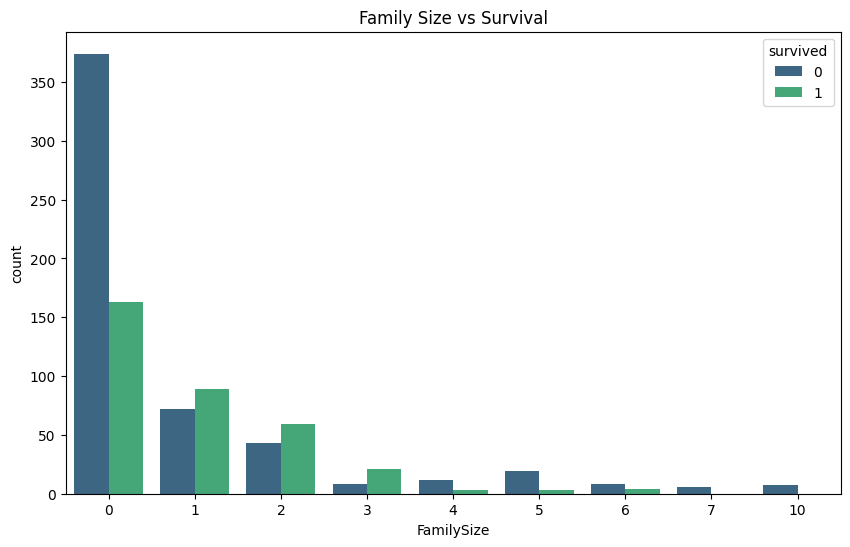

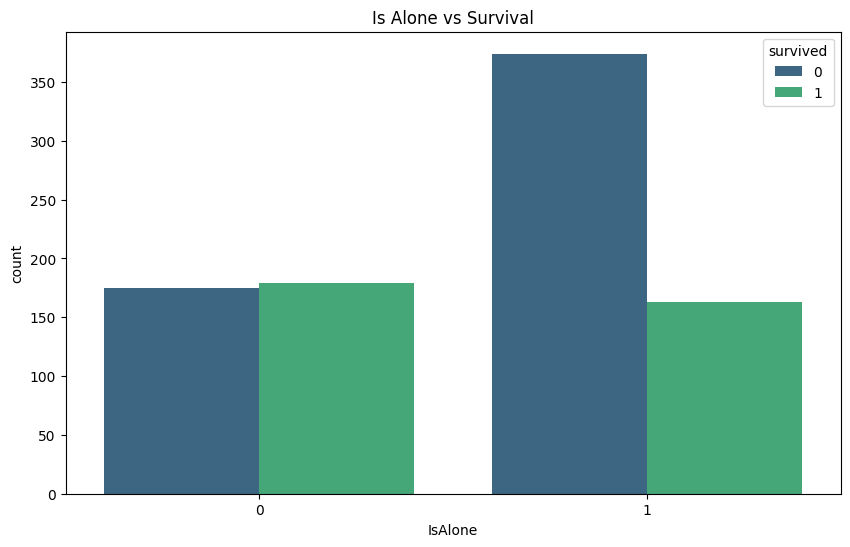

In [14]:
# Creating new features
df['FamilySize'] = df['sibsp'] + df['parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Visualizing the new features
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='survived', data=df, palette='viridis')
plt.title('Family Size vs Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='IsAlone', hue='survived', data=df, palette='viridis')
plt.title('Is Alone vs Survival')
plt.show()


### Task 4

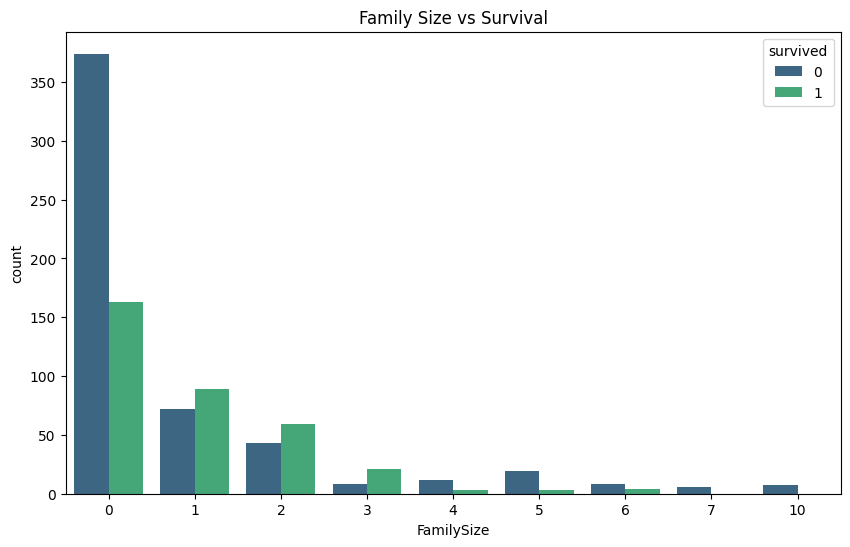

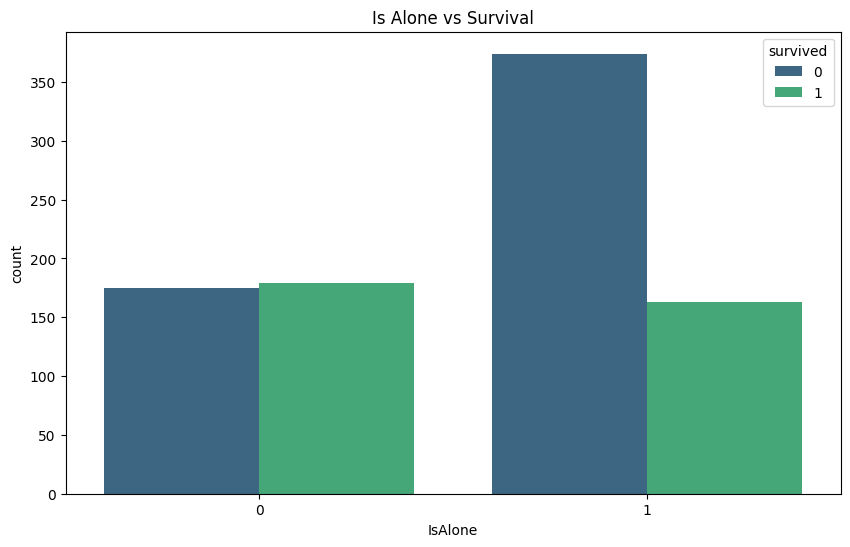

In [15]:
# Creating new features
df['FamilySize'] = df['sibsp'] + df['parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Visualizing the new features
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='survived', data=df, palette='viridis')
plt.title('Family Size vs Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='IsAlone', hue='survived', data=df, palette='viridis')
plt.title('Is Alone vs Survival')
plt.show()


ValueError: could not convert string to float: 'no'

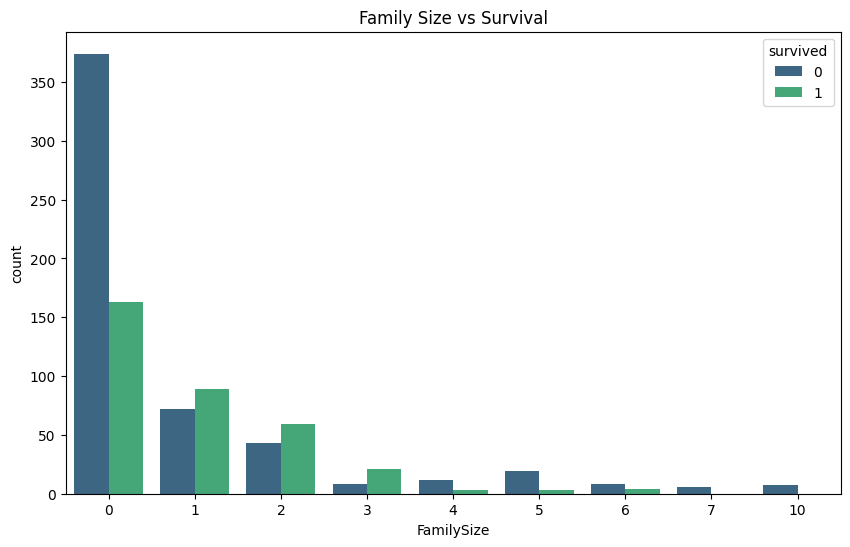

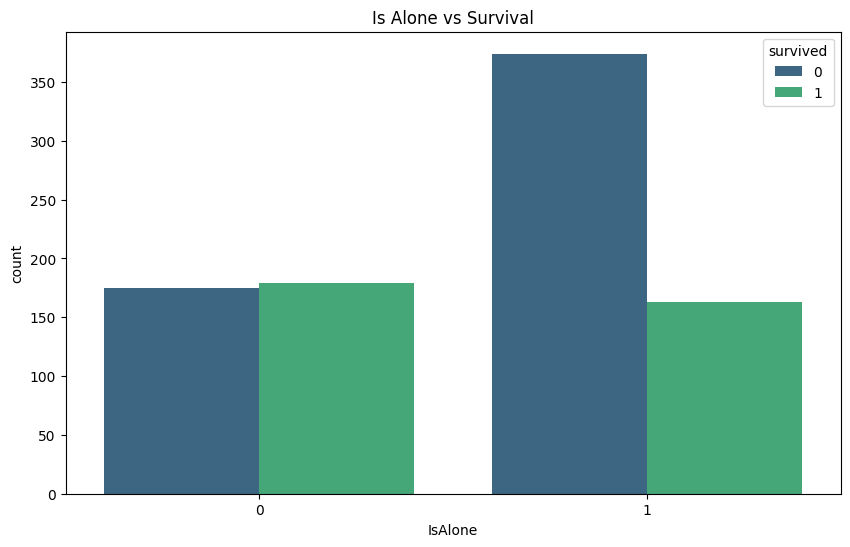

In [ ]:
# Creating new features
df['FamilySize'] = df['sibsp'] + df['parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Visualizing the new features
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='survived', data=df, palette='viridis')
plt.title('Family Size vs Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='IsAlone', hue='survived', data=df, palette='viridis')
plt.title('Is Alone vs Survival')
plt.show()
